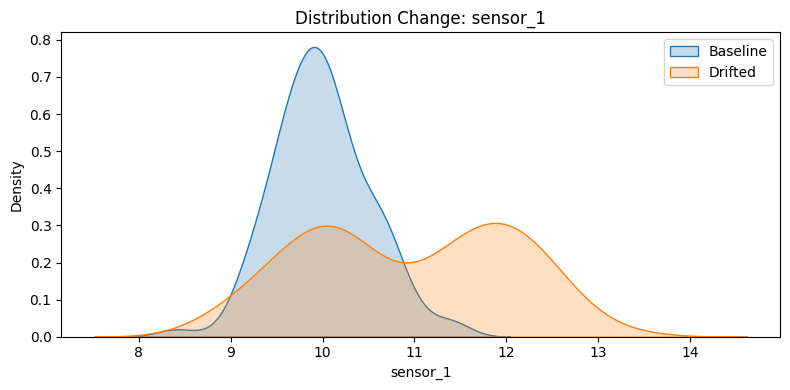

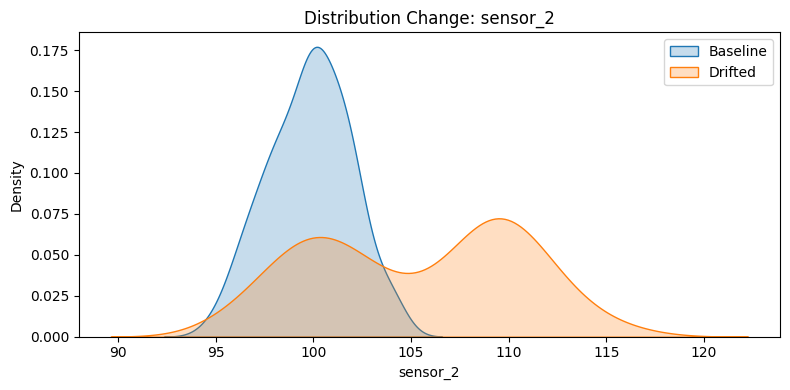

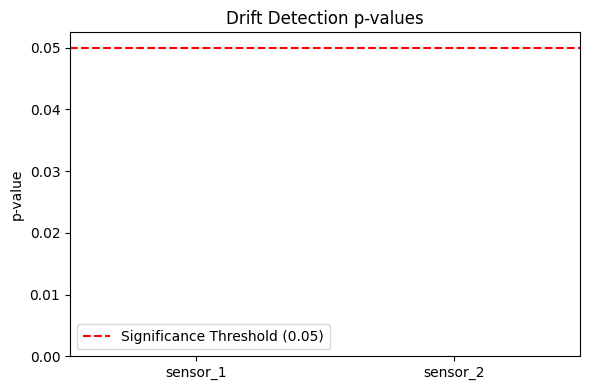

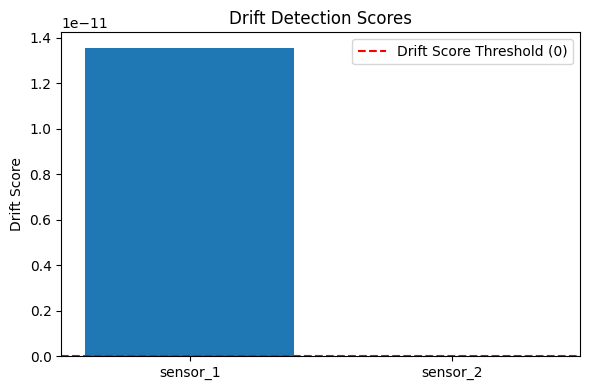

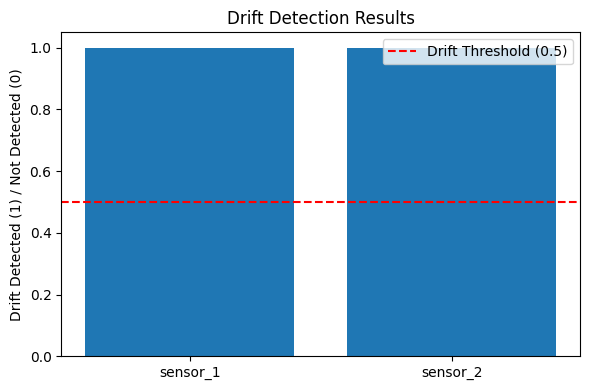

In [6]:
# visualize_drift.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install --upgrade --force-reinstall alibi-detect[cd]


from alibi_detect.cd import KSDrift

# Load data
baseline = pd.read_csv("../data/sensor_baseline.csv").drop(columns=["timestamp"])
drifted = pd.read_csv("../data/sensor_drifted.csv").drop(columns=["timestamp"])

# Plot distributions
for col in baseline.columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(baseline[col], label="Baseline", fill=True)
    sns.kdeplot(drifted[col], label="Drifted", fill=True)
    plt.title(f"Distribution Change: {col}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{col}_drift.png")
    plt.show()

# Run drift detection
detector = KSDrift(x_ref=baseline.values, p_val=0.05)
#detector.fit(baseline.values)
preds = detector.predict(drifted.values)

# Plot drift p-values
p_vals = preds['data']['p_val']
plt.figure(figsize=(6, 4))
plt.bar(baseline.columns, p_vals)
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title("Drift Detection p-values")
plt.ylabel("p-value")
plt.legend()
plt.tight_layout()
plt.savefig("drift_pvalues.png")
plt.show()

# Plot drift scores
plt.figure(figsize=(6, 4))
plt.bar(baseline.columns, preds['data']['p_val'])   
plt.axhline(0, color='red', linestyle='--', label='Drift Score Threshold (0)')
plt.title("Drift Detection Scores")
plt.ylabel("Drift Score")
plt.legend()
plt.tight_layout()
plt.savefig("drift_scores.png")
plt.show()
# Save drift detection results
plt.figure(figsize=(6, 4))
plt.bar(baseline.columns, preds['data']['is_drift'])
plt.axhline(0.5, color='red', linestyle='--', label='Drift Threshold (0.5)')
plt.title("Drift Detection Results")
plt.ylabel("Drift Detected (1) / Not Detected (0)")
plt.legend()
plt.tight_layout()
plt.savefig("drift_results.png")
plt.show()




## Cumulative Distribution Function (CDF) Comparison :
Comparing the CDFs of the baseline and drifted data

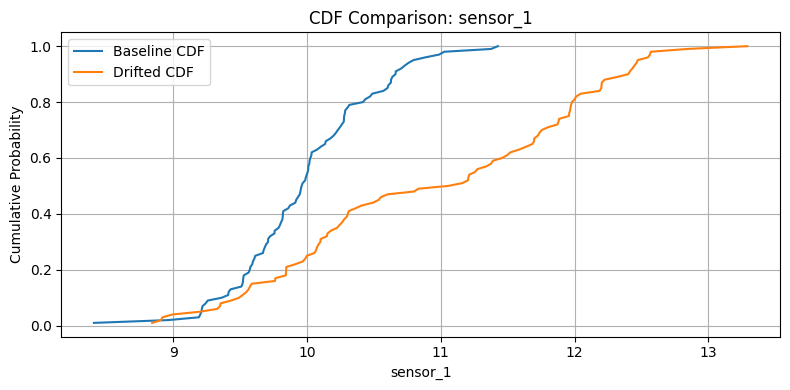

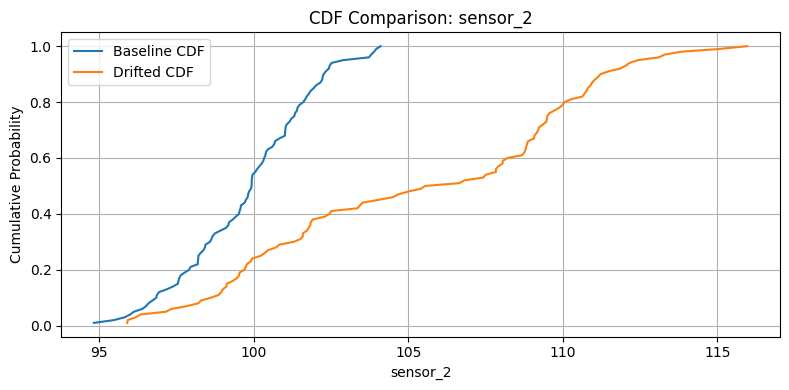

In [7]:
import numpy as np

for col in baseline.columns:
    plt.figure(figsize=(8, 4))
    # Baseline CDF
    sorted_baseline = np.sort(baseline[col])
    cdf_baseline = np.arange(1, len(sorted_baseline) + 1) / len(sorted_baseline)
    plt.plot(sorted_baseline, cdf_baseline, label="Baseline CDF")

    # Drifted CDF
    sorted_drifted = np.sort(drifted[col])
    cdf_drifted = np.arange(1, len(sorted_drifted) + 1) / len(sorted_drifted)
    plt.plot(sorted_drifted, cdf_drifted, label="Drifted CDF")

    plt.title(f"CDF Comparison: {col}")
    plt.xlabel(col)
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{col}_cdf_comparison.png")
    plt.show()

## Box Plots

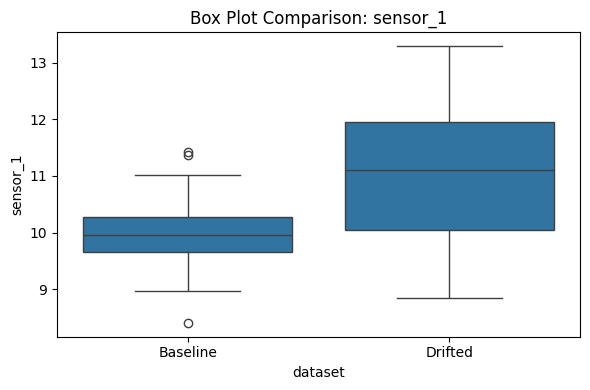

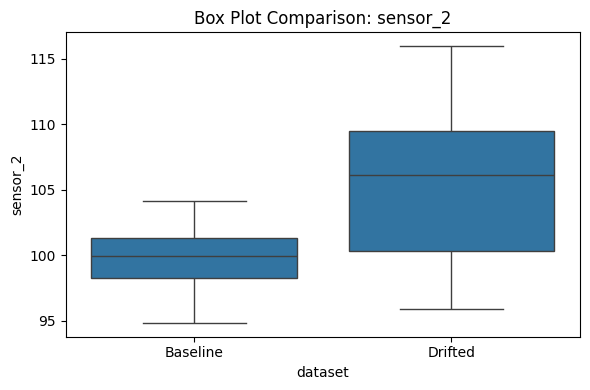

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine baseline and drifted data with a label
baseline_labeled = baseline.copy()
baseline_labeled['dataset'] = 'Baseline'
drifted_labeled = drifted.copy()
drifted_labeled['dataset'] = 'Drifted'
combined_df = pd.concat([baseline_labeled, drifted_labeled])

# Create box plots for each feature
for col in baseline.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='dataset', y=col, data=combined_df)
    plt.title(f"Box Plot Comparison: {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"{col}_boxplot_comparison.png")
    plt.show()

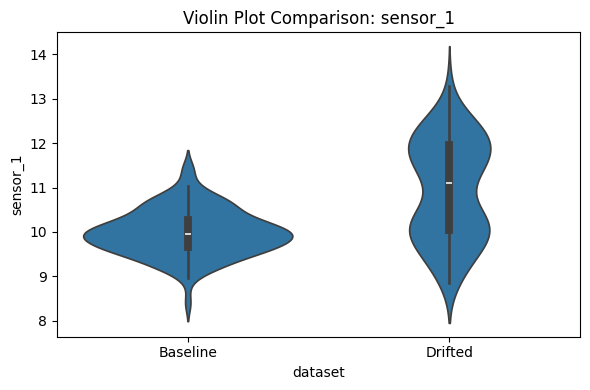

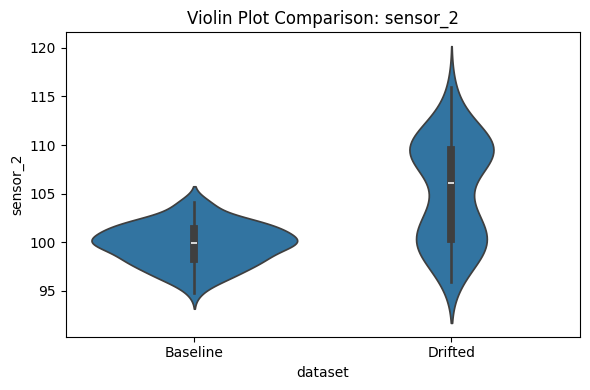

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine baseline and drifted data with a label
baseline_labeled = baseline.copy()
baseline_labeled['dataset'] = 'Baseline'
drifted_labeled = drifted.copy()
drifted_labeled['dataset'] = 'Drifted'
combined_df = pd.concat([baseline_labeled, drifted_labeled])

# Create violin plots for each feature
for col in baseline.columns:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='dataset', y=col, data=combined_df)
    plt.title(f"Violin Plot Comparison: {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"{col}_violinplot_comparison.png")
    plt.show()